In [1]:
# Build a ping percentile plot

import matplotlib.pyplot as plt
from numpy import percentile
from csv import reader
import math

In [3]:
shs_p0_w = []
shs_p0_lat = []
shs_p0_tput = []

shs_p128_w = []
shs_p128_lat = []
shs_p128_tput = []

shs_p1024_w = []
shs_p1024_lat = []
shs_p1024_tput = []

apl_p0_w = []
apl_p0_lat = []
apl_p0_tput = []

apl_p128_w = []
apl_p128_lat = []
apl_p128_tput = []

apl_p1024_w = []
apl_p1024_lat = []
apl_p1024_tput = []

with open("synchs-p0.csv") as f:
    rdr = reader(f)
    for row in rdr:
        shs_p0_w.append(float(row[0])/1000)
        shs_p0_tput.append(float(row[1])/1000)
        shs_p0_lat.append(float(row[2]))

with open("synchs-p128.csv") as f:
    rdr = reader(f)
    for row in rdr:
        shs_p128_w.append(float(row[0])/1000)
        shs_p128_tput.append(float(row[1])/1000)
        shs_p128_lat.append(float(row[2]))

with open("synchs-p1024.csv") as f:
    rdr = reader(f)
    for row in rdr:
        shs_p1024_w.append(float(row[0])/1000)
        shs_p1024_tput.append(float(row[1])/1000)
        shs_p1024_lat.append(float(row[2]))

with open("apollo-p0.csv") as f:
    rdr = reader(f)
    for row in rdr:
        apl_p0_w.append(float(row[0])/1000)
        apl_p0_tput.append(float(row[1])/1000)
        apl_p0_lat.append(float(row[2]))

with open("apollo-p128.csv") as f:
    rdr = reader(f)
    for row in rdr:
        apl_p128_w.append(float(row[0])/1000)
        apl_p128_tput.append(float(row[1])/1000)
        apl_p128_lat.append(float(row[2]))

with open("apollo-p1024.csv") as f:
    rdr = reader(f)
    for row in rdr:
        apl_p1024_w.append(float(row[0])/1000)
        apl_p1024_tput.append(float(row[1])/1000)
        apl_p1024_lat.append(float(row[2]))

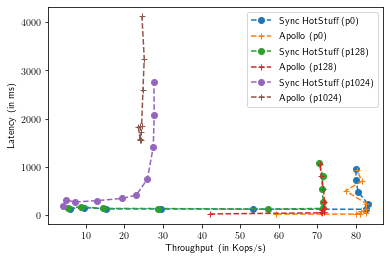

In [13]:
plt.rc('text',usetex=True)
plt.plot(shs_p0_tput,shs_p0_lat, label="Sync HotStuff (p0)", linestyle='--', marker='o')
plt.plot(apl_p0_tput,apl_p0_lat, label="Apollo (p0)", linestyle='--', marker='+')
plt.plot(shs_p128_tput,shs_p128_lat, label="Sync HotStuff (p128)", linestyle='--', marker='o')
plt.plot(apl_p128_tput,apl_p128_lat, label="Apollo (p128)", linestyle='--', marker='+')
plt.plot(shs_p1024_tput,shs_p1024_lat, label="Sync HotStuff (p1024)", linestyle='--', marker='o')
plt.plot(apl_p1024_tput,apl_p1024_lat, label="Apollo (p1024)", linestyle='--', marker='+')
plt.legend()
plt.xlabel("Throughput (in Kops/s)")
plt.ylabel("Latency (in ms)")
# plt.show()
# plt.xticks(log_points)
plt.savefig("Tput-vs-latency-for-diff-p.pdf")

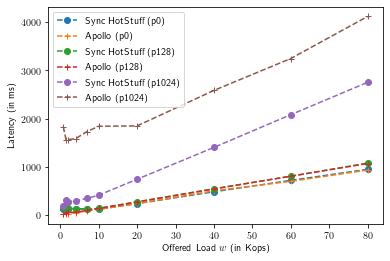

In [12]:
plt.rc('text',usetex=True)
plt.plot(shs_p0_w,shs_p0_lat, label="Sync HotStuff (p0)", linestyle='--', marker='o')
plt.plot(apl_p0_w,apl_p0_lat, label="Apollo (p0)", linestyle='--', marker='+')
plt.plot(shs_p128_w,shs_p128_lat, label="Sync HotStuff (p128)", linestyle='--', marker='o')
plt.plot(apl_p128_w,apl_p128_lat, label="Apollo (p128)", linestyle='--', marker='+')
plt.plot(shs_p1024_w,shs_p1024_lat, label="Sync HotStuff (p1024)", linestyle='--', marker='o')
plt.plot(apl_p1024_w,apl_p1024_lat, label="Apollo (p1024)", linestyle='--', marker='+')
plt.legend()
plt.xlabel("Offered Load $w$ (in Kops)")
plt.ylabel("Latency (in ms)")
# plt.show()
# plt.xticks(log_points)
plt.savefig("Latency-vs-w-for-diff-p.pdf")

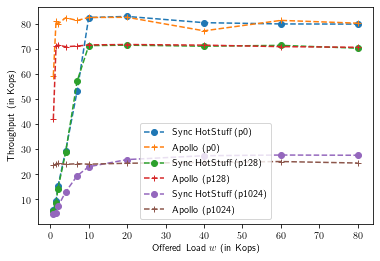

In [11]:
plt.rc('text',usetex=True)
plt.plot(shs_p0_w,shs_p0_tput, label="Sync HotStuff (p0)", linestyle='--', marker='o')
plt.plot(apl_p0_w,apl_p0_tput, label="Apollo (p0)", linestyle='--', marker='+')
plt.plot(shs_p128_w,shs_p128_tput, label="Sync HotStuff (p128)", linestyle='--', marker='o')
plt.plot(apl_p128_w,apl_p128_tput, label="Apollo (p128)", linestyle='--', marker='+')
plt.plot(shs_p1024_w,shs_p1024_tput, label="Sync HotStuff (p1024)", linestyle='--', marker='o')
plt.plot(apl_p1024_w,apl_p1024_tput, label="Apollo (p1024)", linestyle='--', marker='+')
plt.legend()
plt.xlabel("Offered Load $w$ (in Kops)")
plt.ylabel("Throughput (in Kops)")
# plt.show()
# plt.xticks(log_points)
plt.savefig("Tput-vs-w-for-diff-p.pdf")